In [16]:
import os

# Specify the folder containing the files
folder_path = "Z:\\Lab Data\\D52_Calibration_Ba137\\New_initialized_calibration_freq_files"

# Specify the output file
output_file = "filtered_data.txt"

# Initialize a list to store the data
filtered_data = []

# Loop through all the files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Ensure we are only processing files (not directories)
    if os.path.isfile(file_path):
        with open(file_path, "r") as file:
            lines = file.readlines()

            # Check if the file has exactly 7 lines
            if len(lines) == 7:
                # Extract the middle value (2nd column) from each line
                middle_values = [float(line.split(",")[1].strip()) for line in lines]

                # Add the middle values to the filtered data list
                filtered_data.append(middle_values)

# Save the filtered data to the output file
with open(output_file, "w") as out_file:
    for data in filtered_data:
        out_file.write(f"{data}\n")

print(f"Filtered data saved to {output_file}")


Filtered data saved to filtered_data.txt


[[20.217, 36.491, 41.287, 31.999, 40.63], [21.058, 39.246, 46.252, 34.332, 44.865], [22.214, 39.697, 47.972, 36.611, 47.133], [23.105, 41.098, 47.881, 37.274, 47.099], [21.795, 38.824, 45.762, 34.861, 44.672], [20.254, 36.416, 42.284, 31.458, 41.655], [21.246, 37.496, 45.354, 34.746, 43.903], [21.332, 38.22, 45.884, 34.63, 45.166], [21.705, 37.9, 47.374, 35.422, 45.641], [22.92, 40.899, 50.219, 38.375, 51.518], [23.14, 41.786, 51.203, 37.884, 46.564], [22.587, 39.757, 48.186, 35.614, 48.028], [23.971, 41.232, 50.714, 38.162, 51.12], [24.536, 44.093, 52.408, 38.024, 50.445], [25.154, 43.919, 54.59, 40.424, 52.293], [27.036, 45.798, 56.081, 43.538, 54.946], [24.934, 43.58, 53.426, 40.85, 52.035], [24.938, 41.95, 53.154, 41.394, 51.819], [27.379, 47.614, 58.23, 43.424, 56.631], [27.69, 47.483, 57.545, 44.293, 59.55], [32.272, 57.67, 67.705, 52.272, 67.344], [31.906, 53.025, 67.286, 49.646, 68.642], [33.552, 57.845, 69.372, 53.269, 68.468], [32.372, 57.594, 68.761, 52.117, 70.847], [22.675

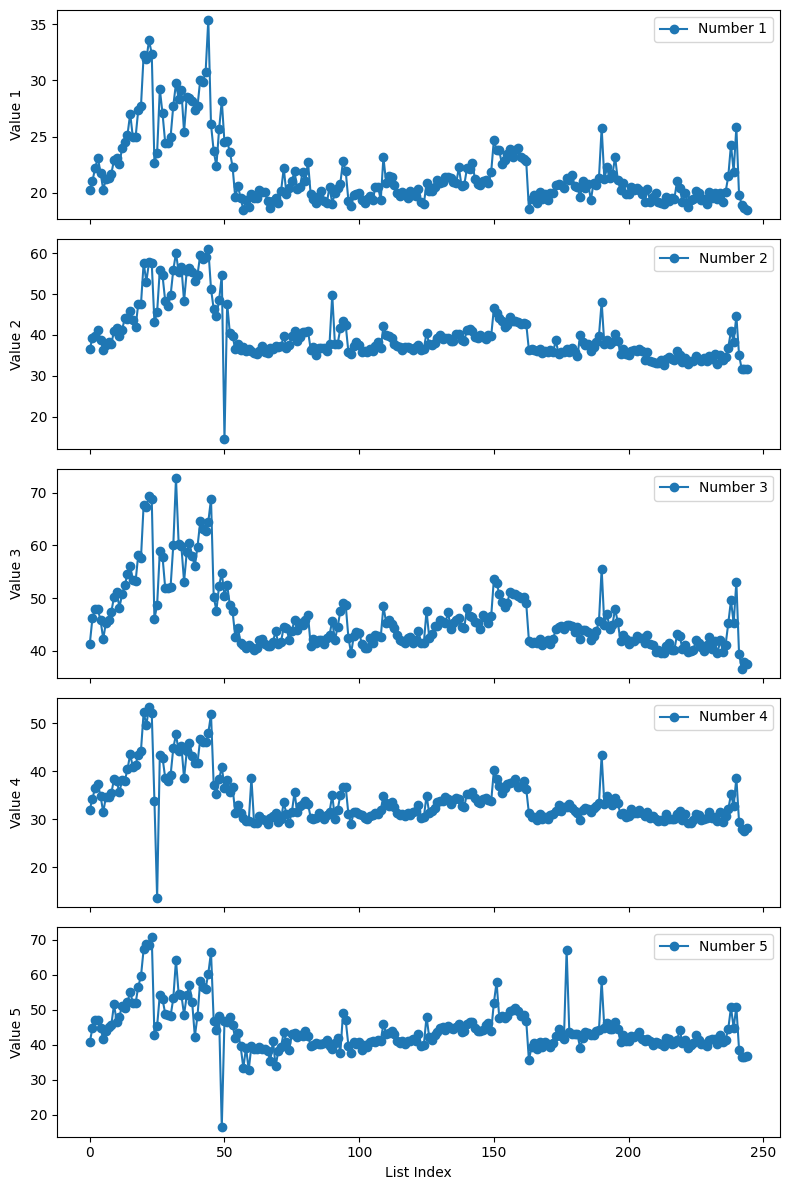

In [18]:
import ast
import matplotlib.pyplot as plt

# Specify the input file containing the filtered data
input_file = "filtered_data.txt"

# Initialize a list to store the data
all_data = []

# Read the file and parse the lists
with open(input_file, "r") as file:
    for line in file:
        # Convert the string representation of the list back to a Python list
        data_list = ast.literal_eval(line.strip())
        all_data.append(data_list)

# Calculate the average for each of the last 5 indices across all lists
num_indices = 5
averages = median_values

# Filter out lists where any of the last 5 data points deviate from their respective index average by more than 100
filtered_data = []
for data in all_data:
    last_5 = data[-5:]
    if all(abs(averages[i] - last_5[i]) <= 30 for i in range(num_indices)):
        filtered_data.append(data)

# Extract the last 5 numbers from the filtered lists
last_5_data = [data[-5:] for data in filtered_data]
print(last_5_data)
# Plot each of the last 5 numbers in separate subplots
fig, axes = plt.subplots(5, 1, figsize=(8, 12), sharex=True)

for i in range(5):
    # Extract the i-th number from each list
    values = [data[i] for data in last_5_data]
    axes[i].plot(values, marker="o", linestyle="-", label=f"Number {i + 1}")
    axes[i].set_ylabel(f"Value {i + 1}")
    axes[i].legend()

axes[-1].set_xlabel("List Index")
plt.tight_layout()
plt.show()


In [14]:
gm_factors = []

for i in last_5_data:
    rabis = np.pi/np.array(i)

    gm_factors.append(rabis/rabis[1])

[[1.80496612 1.         0.88383753 1.14037939 0.89812946]
 [1.86370975 1.         0.84852547 1.14313177 0.87475761]
 [1.7870262  1.         0.82750354 1.08429161 0.84223368]
 [1.77874919 1.         0.85833629 1.10259162 0.87258753]
 [1.78132599 1.         0.84838949 1.11368004 0.86909026]
 [1.79796583 1.         0.8612241  1.15760697 0.87422878]
 [1.76484985 1.         0.82674075 1.0791458  0.85406464]
 [1.79167448 1.         0.8329701  1.10366734 0.84621175]
 [1.74614144 1.         0.80001689 1.06995652 0.83039372]
 [1.78442408 1.         0.81441287 1.06577199 0.79387787]
 [1.80579084 1.         0.816085   1.10299863 0.89738854]
 [1.76017178 1.         0.82507367 1.11633066 0.82778796]
 [1.72007843 1.         0.81302993 1.08044652 0.80657277]
 [1.79707369 1.         0.84134102 1.15960972 0.87408068]
 [1.74600461 1.         0.80452464 1.08645854 0.83986384]
 [1.6939636  1.         0.81664022 1.05190868 0.83350926]
 [1.74781423 1.         0.81570771 1.06682987 0.83751321]
 [1.68217179 1

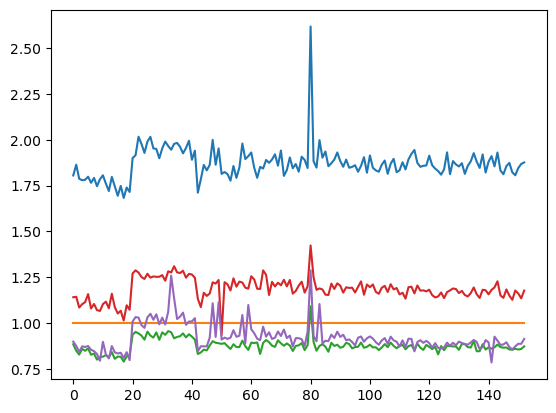

In [16]:
print(np.array(gm_factors))

plt.plot(gm_factors)

In [18]:
import numpy as np
from scipy.optimize import minimize

import numpy as np

matrix = np.loadtxt('matrix.txt', delimiter=',')

# print(matrix[:,3:])
list_br = np.array([matrix[23,3],matrix[14,3],matrix[17,7],matrix[16,7],matrix[15,7]])
# print(list_br)

def g(theta_k,phase_val,kai_val):
    theta_k = theta_k * np.pi/180
    phase_val = phase_val * np.pi/180
    kai_val = kai_val * np.pi/180
    g = np.zeros((5), dtype=complex)

    C_0 = (np.sqrt(3/2))*(1/3) * np.array([[-1,  0, 0],
                                           [ 0, -1, 0],
                                           [ 0,  0, 2]], dtype=complex)
    
    C_p1 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 0,   0,  -1],
                                                    [ 0,   0,  1j],
                                                    [-1,  1j,   0]], dtype=complex)
    
    C_n1 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 0,   0,   1],
                                                    [ 0,   0,  1j],
                                                    [ 1,  1j,   0]], dtype=complex)
    
    C_p2 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 1,   -1j, 0],
                                                    [-1j,  -1,  0],
                                                    [ 0,    0,  0]], dtype=complex)
    
    C_n2 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 1,   1j,  0],
                                                    [1j,   -1,  0],
                                                    [ 0,    0,  0]], dtype=complex)
    
    C = [C_n2, C_n1, C_0, C_p1, C_p2]
    
    e_ll = np.array([np.cos(theta_k),
                      0,
                     -np.sin(theta_k)], dtype=complex)
    
    e_T = np.array([0,
                    1,
                    0], dtype=complex)
    
    k_vec = np.array([np.sin(theta_k), 0, np.cos(theta_k)], dtype=complex)
    
    for q in range(5):
        temp_g = 0+0j
        for i in range(3):
            for j in range(3):
                temp_g += C[q][i, j] * (
                    e_ll[i]*np.cos(kai_val) +
                    e_T[i]*np.sin(kai_val)*np.exp(1j*phase_val)
                ) * k_vec[j]
        g[q] = np.abs(temp_g)
    return g

def optimize_rabi_params(rabi_ratios_target, list_br = list_br, initial_guess=[49, -58, 70], maxiter=10000):

    def calc_piTimes(params, rabi_ratios, list_br):
        tk_val, phase, kai = params
        calculated_rabi_freqs = np.abs(g(tk_val, phase, kai) * list_br)
        calc_rabi_ratios = (calculated_rabi_freqs / calculated_rabi_freqs[1])[[1, 2, 3,4]]
        res = np.linalg.norm(calc_rabi_ratios - rabi_ratios)
        return res

    # Normalize target Rabi ratios
    rabi_ratios = rabi_ratios_target[[1, 2, 3, 4]]

    # Define bounds for the parameters
    tk_bounds = (0, 90)            # Example bounds for tk_val
    phase_bounds = (-90, 90)      # Example bounds for phase
    kai_bounds = (0, 90)        # Example bounds for kai
    bounds = [tk_bounds, phase_bounds, kai_bounds]

    # Optimization options
    options = {'maxiter': maxiter}

    # Perform the minimization with bounds
    result = minimize(
        calc_piTimes,
        initial_guess,
        args=(rabi_ratios, list_br),
        method='L-BFGS-B',
        bounds=bounds,
        options=options
    )

    if result.success:
        optimized_params = result.x
        tk_val, phase, kai = optimized_params

        # Calculate Pi times using the optimized parameters
        calculated_pi_times = (
            np.abs(g(tk_val, phase, kai) * list_br) /
            np.abs(g(tk_val, phase, kai) * list_br)[1]
        )
        return (tk_val, phase, kai), calculated_pi_times, rabi_ratios
    else:
        raise ValueError("Optimization did not converge.")

# Example usage:
pi_times_target = np.array([21.885, 40.4065, 47.84644, 33.788, 43.9078])
rabi_freqs = (np.pi /pi_times_target)
rabi_ratios_target = rabi_freqs/rabi_freqs[1]
(tk_val, phase, kai), calculated_pi_times, input_ratios = optimize_rabi_params(rabi_ratios_target)
print("Optimized Parameters:")
print(f"tk_val: {tk_val}")
print(f"phase: {phase}")
print(f"kai: {kai}")
print("Input Rabi Ratios:", rabi_ratios_target)
print("Calculated rabi ratios:", calculated_pi_times)


Optimized Parameters:
tk_val: 48.34924591026279
phase: -77.30016777961765
kai: 62.47664384165864
Input Rabi Ratios: [1.84631026 1.         0.84450379 1.19588315 0.9202579 ]
Calculated rabi ratios: [1.85010371 1.         0.84450379 1.19588315 0.9202579 ]


In [20]:
fitted_params = []
for rabi_ratios_target in gm_factors:
    (tk_val, phase, kai), calculated_pi_times, input_ratios = optimize_rabi_params(rabi_ratios_target)
    fitted_params.append([(tk_val, phase, kai), calculated_pi_times, rabi_ratios_target])

In [22]:
fitted_theta_k_vals = []
fitted_phase_vals = []
fitted_kai_vals = []
target_ratio = []
fitted_ratio = []
for i in fitted_params:
    print('-----------')
    print(i[0])
    fitted_theta_k_vals.append(i[0][0])
    fitted_phase_vals.append(i[0][1])
    fitted_kai_vals.append(i[0][2])
    print(i[1])
    target_ratio.append(i[2][0])
    print(i[2])
    fitted_ratio.append(i[1][0])

fitted_phase_vals = np.array(fitted_phase_vals)#*np.pi/180
fitted_kai_vals.np.array(fitted_kai_vals)#*np.pi/180

-----------
(47.54341743389044, -61.841369797001256, 60.45209949101204)
[1.76476193 1.         0.88383753 1.14037939 0.89812946]
[1.80496612 1.         0.88383753 1.14037939 0.89812946]
-----------
(47.53761873005807, -69.75164951437957, 61.47995388362879)
[1.7680973  1.         0.84852547 1.14313177 0.87475761]
[1.86370975 1.         0.84852547 1.14313177 0.87475761]
-----------
(46.61358013060788, -63.140928050456395, 61.053502517538895)
[1.66465277 1.         0.82750354 1.08429161 0.84223368]
[1.7870262  1.         0.82750354 1.08429161 0.84223368]
-----------
(46.951221079376694, -59.93727986683106, 60.504418379997006)
[1.69668701 1.         0.85833629 1.10259162 0.87258753]
[1.77874919 1.         0.85833629 1.10259162 0.87258753]
-----------
(47.113832267607826, -63.557688468687836, 60.983239312552634)
[1.71591436 1.         0.84838949 1.11368004 0.86909026]
[1.78132599 1.         0.84838949 1.11368004 0.86909026]
-----------
(47.70915705761969, -72.37258251542235, 61.350984747724

AttributeError: 'list' object has no attribute 'np'

[ 9.17690344e-01 -5.49550342e+00  4.96517934e+00 -1.06114752e+00
  4.52760991e+00  1.11637804e+01 -4.04953943e+00 -5.21164366e+01
 -1.27232928e+01  5.50443379e+00  1.78630968e+00 -2.32386309e+00
 -3.22833391e+01 -1.40486840e+00  1.80336469e+00 -7.60478970e+00
 -1.71439433e+01  3.31170562e+00  1.41273610e+01  2.68783037e+00
  3.78856026e+01 -4.72447235e+00 -8.80915475e+00 -6.52429741e+00
 -7.03693884e+00  1.68051320e+00 -1.36621857e+01  5.20581183e+01
 -3.92412785e+00 -2.58710050e+00  2.13056091e+00  1.29533504e+00
 -5.68917905e+01 -3.20365365e+02  2.03362589e-01 -3.63692234e+00
  6.00650137e+00  1.36166027e+02 -3.94342511e+01 -1.13327097e+01
 -6.42249834e+02 -3.17424179e+00 -1.77775576e+00  1.81512102e+01
 -3.39031153e+00  6.62959449e+00  4.08448734e+00 -3.14681368e+00
 -8.70222422e+00  9.26383535e-01  9.71370078e+00  2.93128546e+00
  1.67752396e+00 -1.66373053e+00  3.13956609e-01  1.61927272e+00
 -3.51375425e-01 -1.01017565e+01  3.22653628e+00  2.42472484e-01
  9.60738809e-01  1.84754

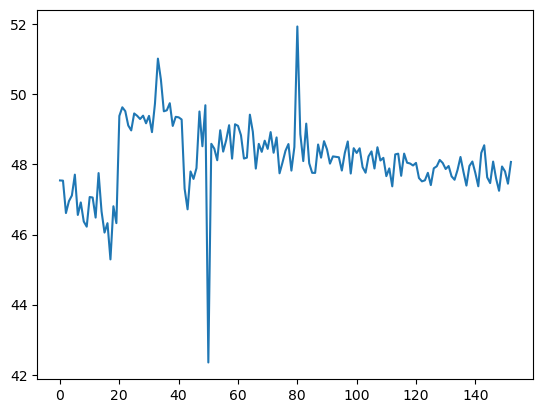

In [24]:
# fitted_kai_vals = 67*np.pi/180
# fitted_phase_vals = -67*np.pi/180
theta_p = (((np.sin(fitted_kai_vals)**2)  -  (np.cos(fitted_kai_vals)**2)) + np.sqrt(1-(4*(np.sin(fitted_kai_vals)**2)*(np.cos(fitted_kai_vals)**2)*(np.sin(fitted_phase_vals)**2))))/(2*np.cos(fitted_kai_vals)*np.sin(fitted_kai_vals)*np.cos(fitted_phase_vals))
print(theta_p)
plt.figure()
plt.plot(fitted_theta_k_vals)
# plt.ylim(-100,100)
plt.show()

In [414]:
%matplotlib widget

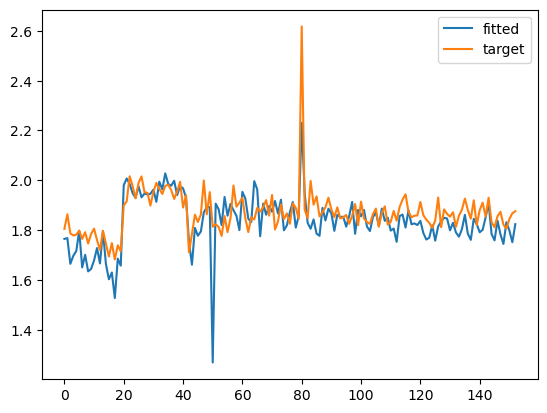

In [26]:
# plt.plot(np.array(fitted_ratio) - np.array(target_ratio))
plt.plot(fitted_ratio,label = 'fitted')
plt.plot(target_ratio,label = 'target')
plt.legend()
plt.show()